# Mall Customer Segmentation Data
## About Dataset
### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv(r'C:\Users\dell\Desktop\Data Science & ML\Mall_customer\Mall_Customers.csv')
df.head(11)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Data vaisulaization

<AxesSubplot:>

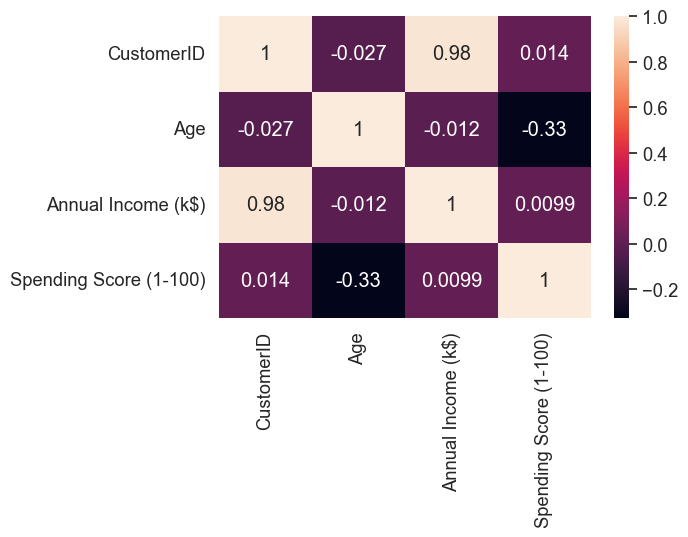

In [5]:
#Data Correlations
fig = plt.figure(dpi = 100)
sns.set(rc={'figure.figsize':[25,10]},font_scale=1.2)
sns.heatmap(df.corr(), annot = True)

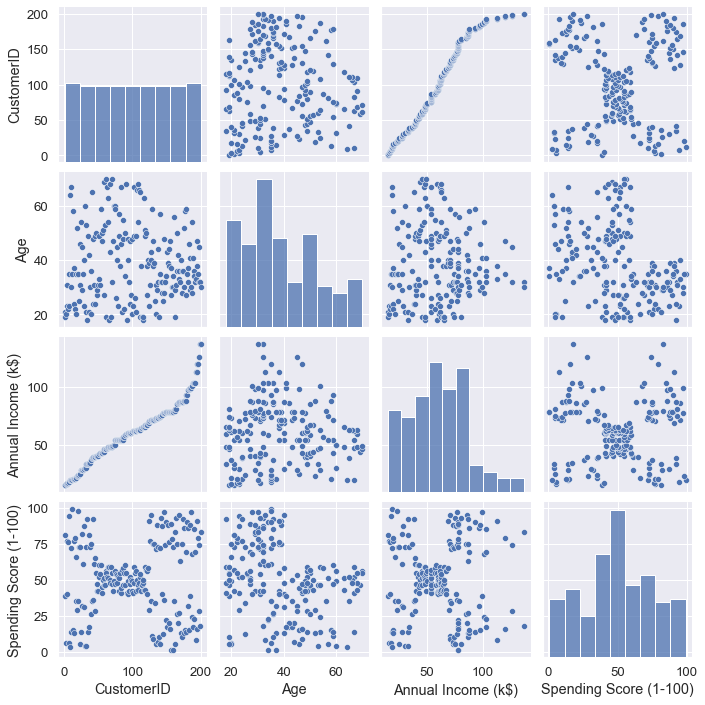

In [6]:
sns.pairplot(df)

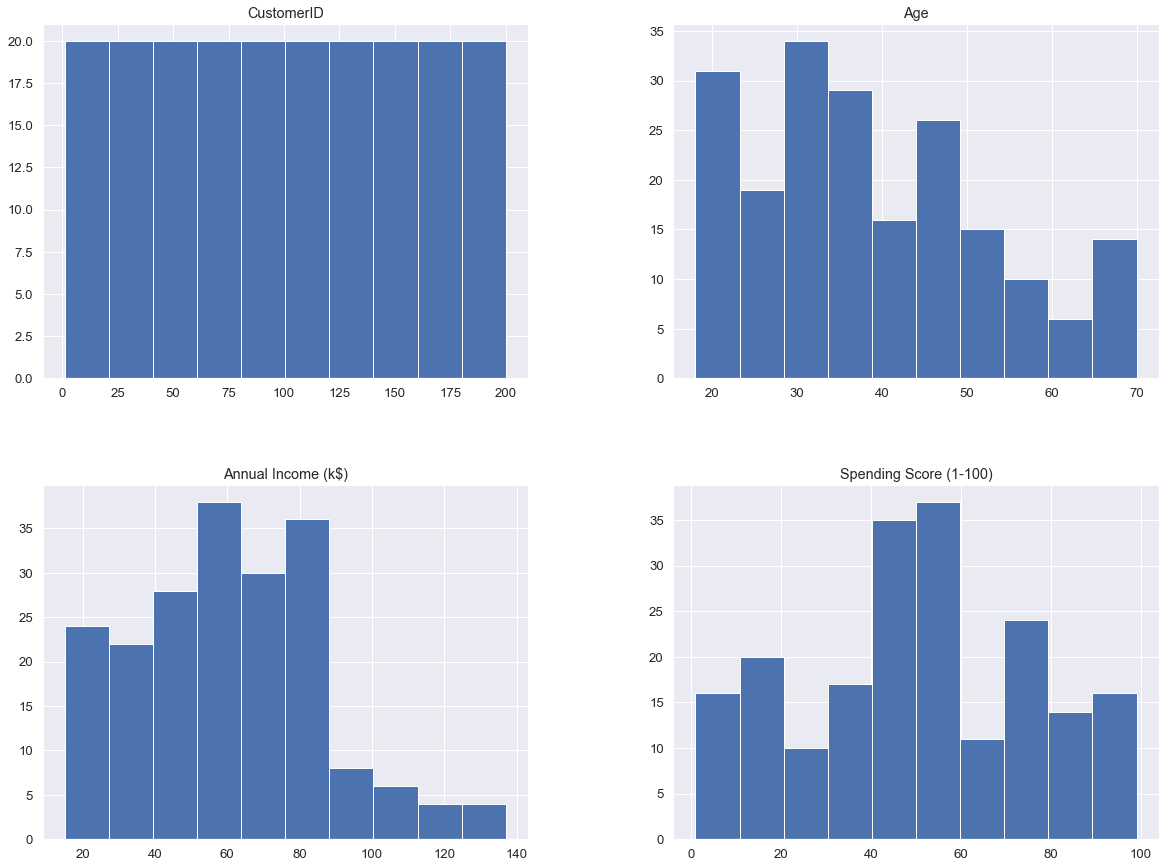

In [7]:
df.hist(figsize=(20,15))
plt.show()

<AxesSubplot:ylabel='Gender'>

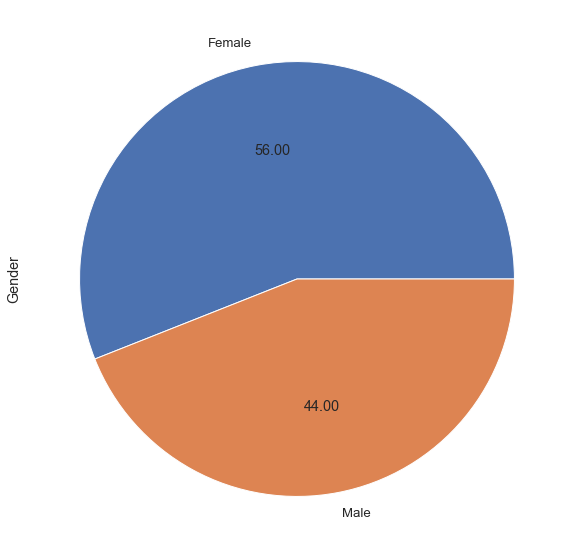

In [8]:
df.Gender.value_counts().plot.pie(autopct='%0.2f')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

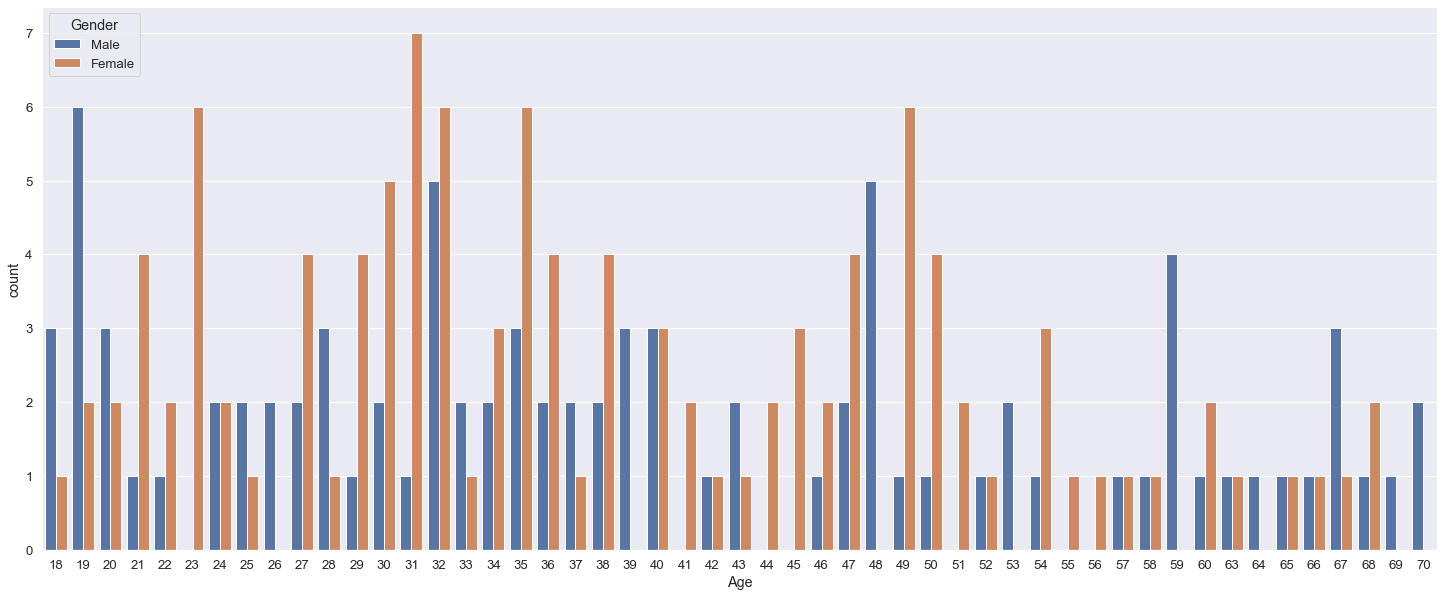

In [9]:
sns.countplot(df.Age,hue=df.Gender)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

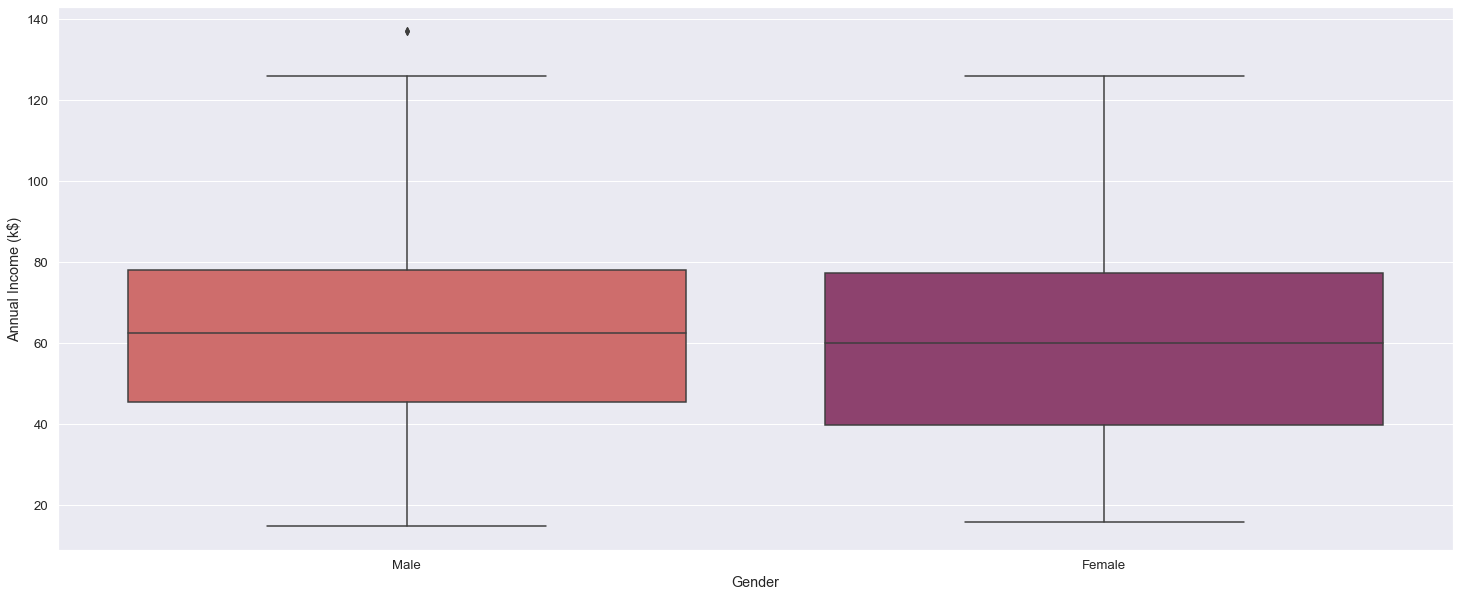

In [10]:
#Catgirical Feature-Bivariate
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df,palette='flare')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

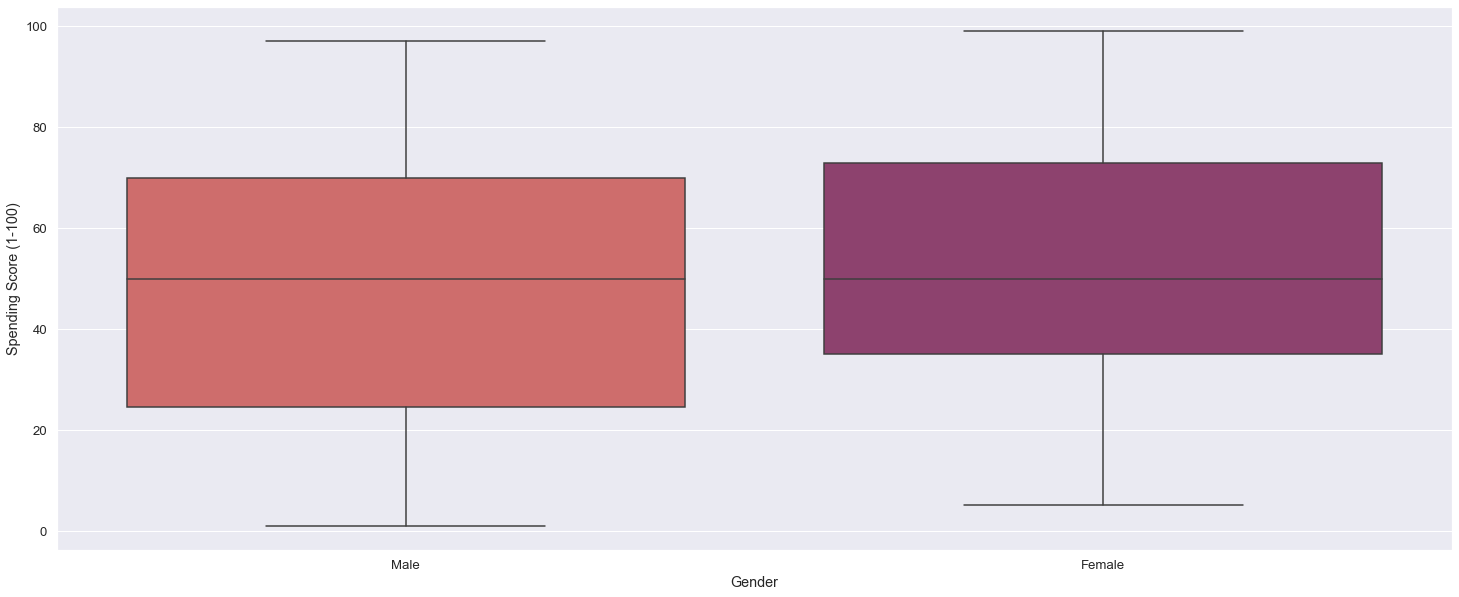

In [11]:
#Catgirical Feature-Bivariate
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df,palette='flare')

# Data cleaning

In [12]:
la=LabelEncoder()

In [13]:
df.Gender=la.fit_transform(df.Gender)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Machine Learning

In [14]:
#creat The Model
#le=StandardScaler()
#xdf=le.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [15]:
clustersn=[]
j=[]

In [16]:
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    clustersn.append(i)
    j.append(model.inertia_)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
clusters=pd.DataFrame({'clusters_K':clustersn,'Error ratio':j})
clusters.style.background_gradient()

,clusters_K,Error ratio
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,157157.757906
5,6,122608.337800
6,7,103233.017244
7,8,86026.534305
8,9,76915.661351
9,10,69722.316522


Text(0, 0.5, 'Error ratio')

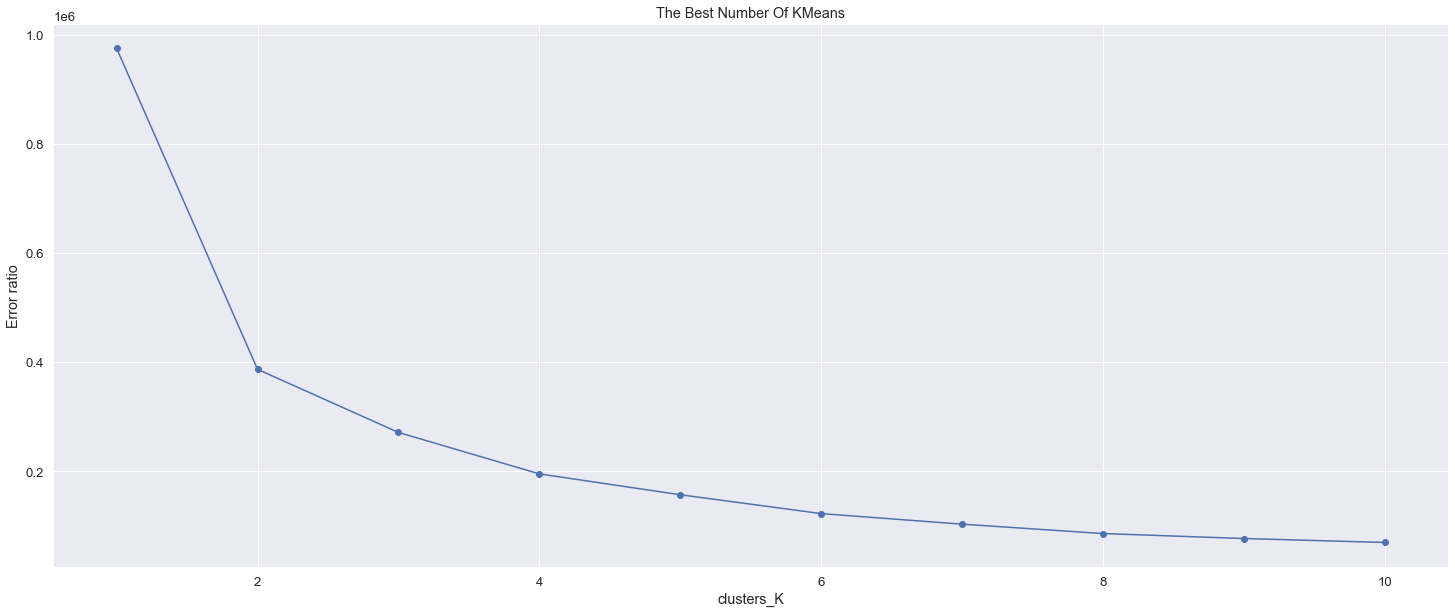

In [18]:
#Elbow Graph
plt.plot(clustersn,j,marker='o')
plt.title('The Best Number Of KMeans')
plt.xlabel('clusters_K')
plt.ylabel('Error ratio')

In [19]:
model = KMeans(n_clusters=4)
model.fit(df)
prediction=model.predict(df)

In [20]:
df['K_mean']=prediction
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_mean
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


In [21]:
df1=df[df['K_mean']==0]
df2=df[df['K_mean']==1]
df3=df[df['K_mean']==2]
df4=df[df['K_mean']==3]

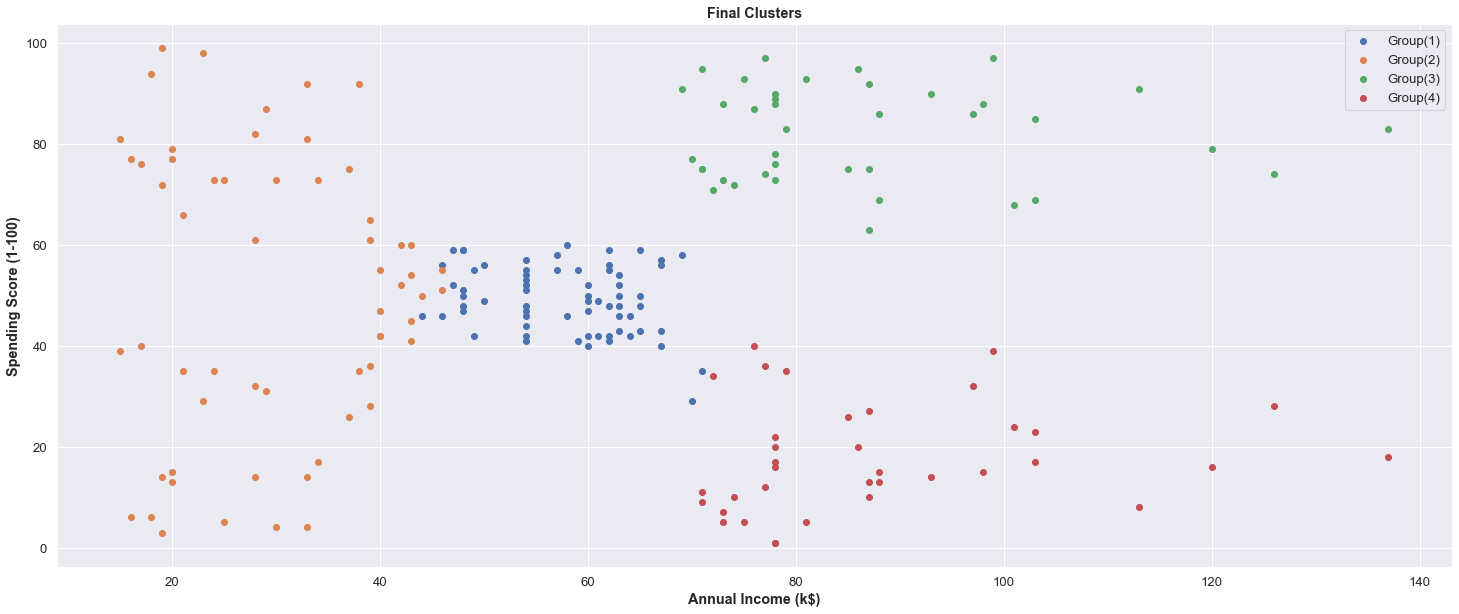

In [22]:
#plt.figure(facecolor='black')
#ax = plt.axes()
#ax.set_facecolor("white")
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group(1)')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group(2)')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group(3)')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group(4)')

plt.title('Final Clusters',fontweight='bold')
plt.xlabel('Annual Income (k$)',fontweight='bold')
plt.ylabel('Spending Score (1-100)',fontweight='bold')
plt.legend()

values of K_mean:- 
 0    66
1    59
2    39
3    36
Name: K_mean, dtype: int64


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


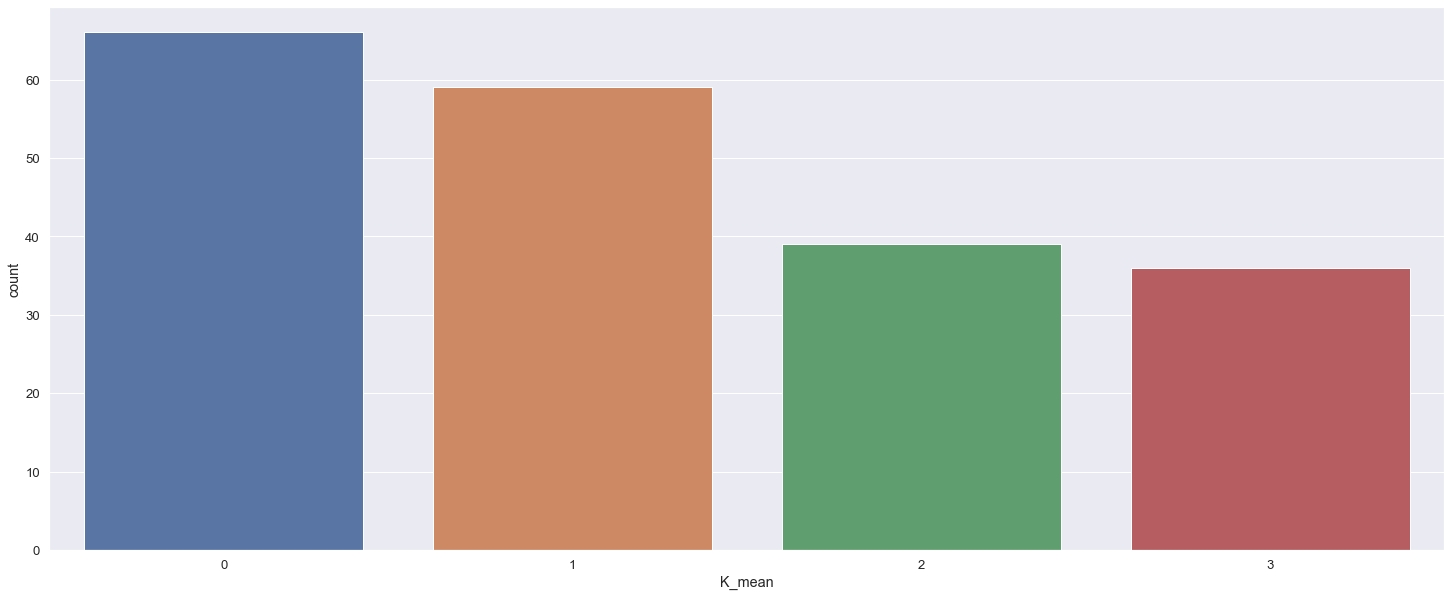

In [27]:
sns.countplot(df.K_mean)
print ('values of K_mean:- \n',df['K_mean'].value_counts())